In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
width = 50
height = 50

num_runs = 200
sample_speed = lambda: np.random.uniform(0.01, 0.1)
sample_box_size = lambda: np.random.uniform(0.1, 0.4)
sample_position = lambda: np.random.uniform(0, 1, (2,))
def sample_velocity(speed):
    rad = np.random.uniform(0.0, 2 * np.pi)
    vel = np.zeros((2,))
    vel[0] = np.sin(rad)
    vel[1] = np.cos(rad)
    return speed * vel

num_frames = 60

In [20]:
class Box:
    def __init__(self, size, initial_position, initial_velocity):
        self.size = size
        self.position = initial_position
        self.velocity = initial_velocity
        
    def draw(self, frame):
        frame_width, frame_height = frame.shape
        px_density = min(frame_width, frame_height)
        x_min = max(int((self.position[0] - self.size / 2) * px_density), 0)
        x_max = min(int((self.position[0] + self.size / 2) * px_density), frame_width - 1)
        y_min = max(int((self.position[1] - self.size / 2) * px_density), 0)
        y_max = min(int((self.position[1] + self.size / 2) * px_density), frame_height - 1)
        for x in range(x_min, x_max + 1):
            for y in range(y_min, y_max + 1):
                frame[x][y] = 0.5
                frame[x][y] = 0.5
                frame[x_min][y] = 1.0
                frame[x_max][y] = 1.0
        
            frame[x][y_min] = 1.0
            frame[x][y_max] = 1.0
    
    def progress(self):
        self.position += self.velocity
        
        # Bounce off walls
        low_bound = self.size / 2
        high_bound = 1.0 - self.size / 2
        for dim in range(2):
            if self.position[dim] < low_bound:
                self.velocity[dim] = -self.velocity[dim]
                self.position[dim] = 2.0 * low_bound - self.position[dim]
            elif self.position[dim] > high_bound:
                self.velocity[dim] = -self.velocity[dim]
                self.position[dim] = 2.0 * high_bound - self.position[dim]

In [22]:
def sample_box():
    speed = sample_speed()
    box_size = sample_box_size()

    return Box(box_size, sample_position(), sample_velocity(speed))

num_boxes = 2

for run_idx in range(num_runs):
    boxes = [sample_box() for i in range(num_boxes)]
    
    for frame_idx in range(num_frames):
        frame = np.zeros((width, height))
        for box in boxes:
            box.draw(frame)
            box.progress()

        img_path = f"./box_world_{num_boxes}/{str(run_idx).zfill(4)}-{str(frame_idx).zfill(4)}.png"
        tf.keras.utils.save_img(img_path, np.reshape(frame, (width, height, 1)))

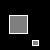

In [23]:
test_img = tf.keras.utils.load_img('./box_world_2/0004-0010.png', color_mode="grayscale")
test_img